Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


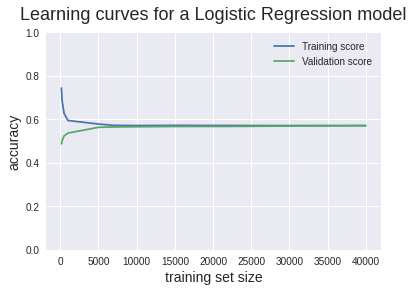

Best accuracy score of Logistic Regression: 0.5699588477366255


Best parameters of Logistic Regression:
{'LogReg__C': 2}
Best validation accuracy of Logistic Regression: 0.5681755829903978


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

y = dataset3['landing_time_difference'].values
X = dataset3.drop('landing_time_difference', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

steps = [('scaler', StandardScaler()),
        ('LogReg', LogisticRegression(penalty='l2',max_iter=200,n_jobs=-1))]

pipeline = Pipeline(steps)
parameters = {'LogReg__C':[0.001,0.01,0.1,2,10,100]}

score = 'accuracy'
cv = GridSearchCV(pipeline, parameters, scoring=score,verbose=4, n_jobs=-1)
cv.fit(X_train,y_train)

best_estimator = cv.best_estimator_
val_accuracy = best_estimator.score(X_test,y_test)

steps = [('scaler', StandardScaler()),
        ('LogReg', LogisticRegression(**best_estimator['LogReg'].get_params()))]

train_sizes = [150, 250, 500, 1000, 5000, 7000, 10000, 15000, 23000, 28000, 35000, 40000]
draw_learning_curves(estimator=Pipeline(steps),model_name="Logistic Regression", X=X, y=y, train_sizes=train_sizes, scoring=score, cv=5)
print("Best {} score of Logistic Regression: {}\n\n".format(score, cv.best_score_))
print("Best parameters of Logistic Regression:\n{}".format(cv.best_params_))
print("Best validation accuracy of Logistic Regression: {}".format(val_accuracy))

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from joblib import dump, load

#dataset2 = pd.read_csv("two_targets_dataset.csv")
dataset3 = pd.read_csv("three_targets_dataset.csv")

#dataset2 = dataset2.sample(frac=1)
dataset3 = dataset3.sample(frac=1)

In [2]:
#dataset2 = dataset2.drop(columns=["Unnamed: 0"])
dataset3 = dataset3.drop(columns=["Unnamed: 0"])
y = dataset3['landing_time_difference'].values
X = dataset3.drop('landing_time_difference', axis=1).values

In [3]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def draw_learning_curves(estimator, model_name, X, y, train_sizes, scoring, cv, shuffle=True):
    """
    Function draws learning curves for given estimator

    Parameters
    ----------
    estimator: estimator used to predict values

    model_name: name of the model to display in the title of the plot

    X: array of examples with shape (n_samples, n_features)

    y: array of target values with respect to X samples

    train_sizes: list of consequtive sizes used while ploting curves

    scoring: str, scoring used while plotting

    shuffle: bool, shuffle data or not

    cv: int, number of cross-validation folds
    """
    train_sizes, train_scores, validation_scores = learning_curve(estimator=estimator,X=X,y=y,train_sizes=train_sizes,
                                                                  scoring=scoring,shuffle=shuffle,cv=cv)

    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    plt.figure()
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
    plt.ylabel(scoring, fontsize = 14)
    plt.xlabel('training set size', fontsize = 14)
    plt.title('Learning curves for a {} model'.format(model_name), fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)
    plt.show()


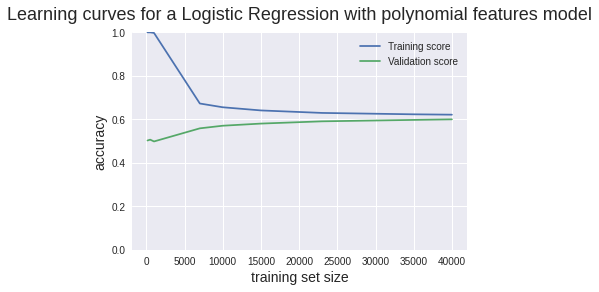

Best accuracy score of Logistic Regression: 0.5982395976223137


Best parameters of Logistic Regression:
{'LogReg__C': 10}
Best validation accuracy of Logistic Regression: 0.6043895747599451


In [ ]:
steps = [('scaler', StandardScaler()),
        ('polyn',PolynomialFeatures(degree=2)),
        ('LogReg', LogisticRegression(penalty='l2',max_iter=200,n_jobs=-1))]

pipeline = Pipeline(steps)
parameters = {'LogReg__C':[0.001,0.01,0.1,2,10,100]}

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

score = 'accuracy'
cv = GridSearchCV(pipeline, parameters, scoring=score, n_jobs=-1)
cv.fit(X_train,y_train)

best_estimator = cv.best_estimator_
val_accuracy = best_estimator.score(X_test,y_test)

steps = [('scaler', StandardScaler()),
        ('polyn',PolynomialFeatures(degree=2)),
        ('LogReg', LogisticRegression(**best_estimator['LogReg'].get_params()))]

train_sizes = [150, 500, 1000, 7000, 10000, 15000, 23000, 35000, 40000]

draw_learning_curves(estimator=Pipeline(steps),model_name="Logistic Regression with polynomial features", X=X, y=y, train_sizes=train_sizes, scoring=score, cv=5)

print("Best {} score of Logistic Regression: {}\n\n".format(score, cv.best_score_))
print("Best parameters of Logistic Regression:\n{}".format(cv.best_params_))
print("Best validation accuracy of Logistic Regression: {}".format(val_accuracy))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[P

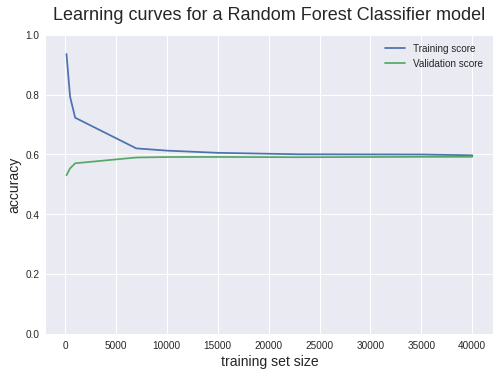

Best accuracy score of Random Forest: 0.5941929583904892

Best parameters of Random Forest:
{'forest__n_estimators': 100, 'forest__min_samples_split': 0.003, 'forest__max_depth': 5}
Best validation accuracy of Random Forest: 0.6012802926383173


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

steps = [('scaler', StandardScaler()),
        ('forest', RandomForestClassifier(n_jobs=-1, verbose=3))]

pipeline = Pipeline(steps)
parameters = {'forest__n_estimators':[60,100,150,200,300],
              'forest__max_depth':[3,5,7],
              'forest__min_samples_split':[0.003,0.01,0.05,0.1,0.3]}

score = 'accuracy'

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

Rcv = RandomizedSearchCV(pipeline, parameters, scoring=score, n_jobs=-1, verbose=3)
Rcv.fit(X_train,y_train)

best_estimator = Rcv.best_estimator_
val_accuracy = best_estimator.score(X_test,y_test)

steps = [('scaler', StandardScaler()),
        ('LogReg', RandomForestClassifier(**best_estimator['forest'].get_params()))]

draw_learning_curves(estimator=Pipeline(steps),model_name="Random Forest Classifier", X=X, y=y, train_sizes=train_sizes, scoring=score, cv=5)

print("Best {} score of Random Forest: {}\n".format(score, Rcv.best_score_))
print("Best parameters of Random Forest:\n{}".format(Rcv.best_params_))
print("Best validation accuracy of Random Forest: {}".format(val_accuracy))

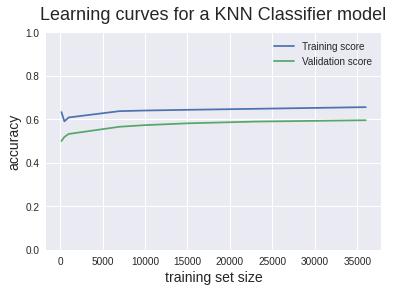

Best accuracy score of KNN: 0.5956104252400548

Best parameters of KNN:
{'knn__n_neighbors': 15}

Best validation accuracy of KNN: 0.5976223136716964


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_jobs=-1))]

pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors':[5,15,100,200]}

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

score = 'accuracy'
cv = GridSearchCV(pipeline, parameters, scoring=score, n_jobs=-1)
cv.fit(X_train,y_train)

best_estimator = cv.best_estimator_
val_accuracy = best_estimator.score(X_test,y_test)

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(**best_estimator['knn'].get_params()))]

train_sizes = [150, 500, 1000, 7000, 10000, 15000, 23000, 36000]
draw_learning_curves(estimator=Pipeline(steps),model_name="KNN Classifier", X=X, y=y, train_sizes=train_sizes, scoring=score, cv=3)

print("Best {} score of KNN: {}\n".format(score, cv.best_score_))
print("Best parameters of KNN:\n{}\n".format(cv.best_params_))
print("Best validation accuracy of KNN: {}".format(val_accuracy))

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def create_cnn_3_targets(padding='same', dropout=0, final_drop=0, nr_in_flat=70, conv_lay=1, optimizer='adam',regularization=2):
  model = keras.Sequential()
  model.add(layers.Conv2D(32, (3,3), padding=padding, activation='relu',input_shape=(7,8,1)))
  model.add(layers.MaxPool2D(pool_size=(2, 2), padding=padding))
  model.add(layers.Dropout(dropout))
  model.add(layers.BatchNormalization())

  for i in range(conv_lay):
    model.add(layers.Conv2D(64, (2,2), padding=padding, activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2), padding=padding))
    model.add(layers.Dropout(dropout))
    model.add(layers.BatchNormalization())
  
  model.add(layers.Flatten())
  model.add(layers.Dense(nr_in_flat, activation='relu', kernel_regularizer=keras.regularizers.l2(regularization)))
  model.add(layers.Dropout(final_drop))
  model.add(layers.Dense(3, activation='softmax'))

  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=["accuracy"])

  return model


def create_feed_forward_3_targets(dropout=0, nr_in_layer=70, layer_no=1, optimizer='adam',regularization=2):
  model = keras.Sequential()

  model.add(layers.Dense(nr_in_layer, input_shape=(56,), kernel_regularizer=keras.regularizers.l2(regularization)))
  model.add(layers.Dropout(dropout))
  model.add(layers.BatchNormalization())

  for i in range(layer_no):
    model.add(layers.Dense(nr_in_layer, input_shape=(56,),kernel_regularizer=keras.regularizers.l2(regularization)))
    model.add(layers.Dropout(dropout))
    model.add(layers.BatchNormalization())
  
  model.add(layers.Dense(3, activation='softmax'))
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=["accuracy"])

  return model

In [ ]:
#CNN Classifier
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

y = dataset3['landing_time_difference'].values
X = dataset3.drop('landing_time_difference', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_cnn = X_train.reshape((len(X_train),7,8,1))
X_test_cnn = X_test.reshape((len(X_test),7,8,1))

score = 'accuracy'

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.5, patience=3)
cnn_model = KerasClassifier(build_fn=create_cnn_3_targets, epochs=4, batch_size=20, validation_split=0.2)

params = dict(optimizer=['sgd', 'adam'], epochs=[4], batch_size=[10, 20, 30, 40], dropout=[0, 0.2],
              final_drop=[0, 0.2], conv_lay=[1,2,3], regularization=[0.1,2,4,10], verbose=[2])

rs_cnn = RandomizedSearchCV(cnn_model, params, cv=4, scoring=score)
rs_cnn.fit(X_train_cnn, y_train)
best_estimator = rs_cnn.best_estimator_
cnn_val_accuracy = best_estimator.score(X_test_cnn,y_test)

Epoch 1/4


In [ ]:
print("Best {} score of CNN: {}\n".format(score, rs_cnn.best_score_))
print("Best parameters of CNN:\n{}\n".format(rs_cnn.best_params_))
print("Best validation accuracy of CNN: {}".format(cnn_val_accuracy))

train_sizes = [150, 500, 1000, 7000, 10000, 15000, 23000]
cnn_model = KerasClassifier(**best_estimator.get_params())
draw_learning_curves(estimator=cnn_model,model_name="CNN Classifier", X=X_train_cnn, y=y_train, train_sizes=train_sizes, scoring=score, cv=4)